Supervised Learning | Aprendisaje supervisado

target: Depression | Objetivo


In [40]:

# semilla para codigo reproducible
import numpy as np
np.random.seed(0)
import random
random.seed(0)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time

import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#SETUP SEABORN
# Configurar las opciones predeterminadas de Seaborn
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# También puedes personalizar más detalles como las fuentes, el tamaño de la figura, etc.
sns.set_context("notebook")  # Ajusta el contexto (puede ser 'paper', 'talk', 'notebook', 'poster')

# Si deseas más personalización:
sns.set_palette("deep")  # Establece una paleta de colores predeterminada
sns.set_style("ticks")  # Para tener los bordes en lugar de las cuadrículas (o "whitegrid", "darkgrid", "white", "dark")

# Ahora puedes usarlo para cualquier gráfico
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [42]:
def load():
  train = pd.read_csv("train (2).csv", index_col = 'id')
  test = pd.read_csv("test (2).csv", index_col = 'id')
  return train, test

train, test = load()
train

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [43]:
# desc.  stats
train.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [44]:
# % missing values
train.isnull().mean().sort_values(ascending = False).head(11)

,0
Study Satisfaction,0.801727
Academic Pressure,0.801727
CGPA,0.801720
Profession,0.260341
Work Pressure,0.198422
Job Satisfaction,0.198365
Dietary Habits,0.000028
Financial Stress,0.000028
Degree,0.000014
Family History of Mental Illness,0.000000


In [45]:
# proportion of target variable
train['Depression'].value_counts(normalize=True) # this is a "benchmark"

,proportion
Depression,
0,0.818287
1,0.181713


In [46]:
# Y
y = train.pop('Depression')

In [47]:
# drop ID col. and name col.
# "ya que son columnas que no me dan informacion util para mi modelo. y pueden entorpecer a un arbol de deciciones"
train=train.drop('Name',axis=1)
test=test.drop('Name',axis=1)

In [48]:
test

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
140700,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
140701,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
140702,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
140703,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
140704,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
234496,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
234497,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No


In [49]:
categorical = [var for var in train.columns if train[var].dtype == 'O']

# LISTA DE VARIABLES NUMERICAS
numerical = [var for var in train.columns if train[var].dtype != 'O']

In [50]:
def concat(train,test):
  df = pd.concat([train,test], axis = 0)
  return df

df = concat(train,test)
df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
234496,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
234497,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No


In [51]:
# Calcular la cardinalidad de cada columna categórica
cardinalities = {col: df[col].nunique() for col in categorical}



# Mostrar los resultados
# display(cardinalities)

# Iterando sobre el diccionario
binarios = []
for key, value in cardinalities.items():
    if value == 2:
      # print(f"Clave: {key}, Valor: {value}")
      binarios.append(key)

binarios

['Gender',
 'Working Professional or Student',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [52]:
train[binarios].head()

,Gender,Working Professional or Student,Have you ever had suicidal thoughts ?,Family History of Mental Illness
id,,,,
0,Female,Working Professional,No,No
1,Male,Working Professional,Yes,No
2,Male,Student,Yes,No
3,Male,Working Professional,Yes,Yes
4,Female,Working Professional,Yes,Yes


## Seaborn Graphic Analisis

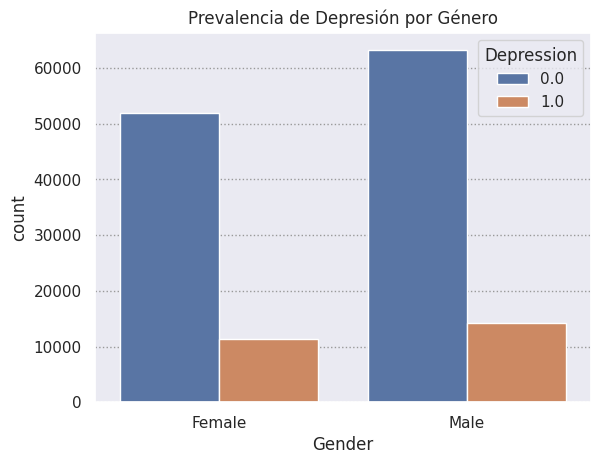

In [53]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(x='Gender', hue=y, data=df)
plt.title('Prevalencia de Depresión por Género')
plt.show()

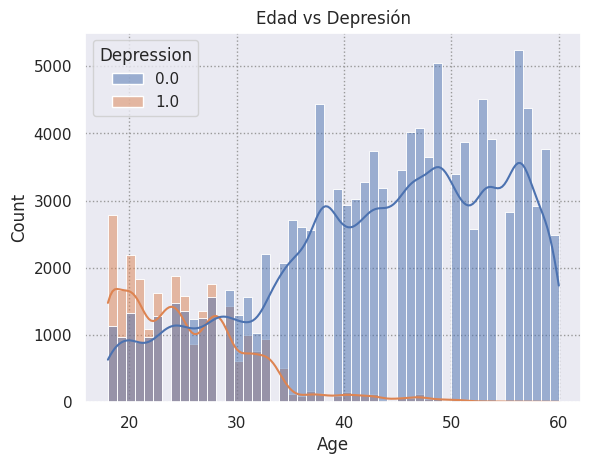

In [15]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.histplot(x='Age', hue=y, data=df, kde = True)
plt.title('Edad vs Depresión')
plt.show()

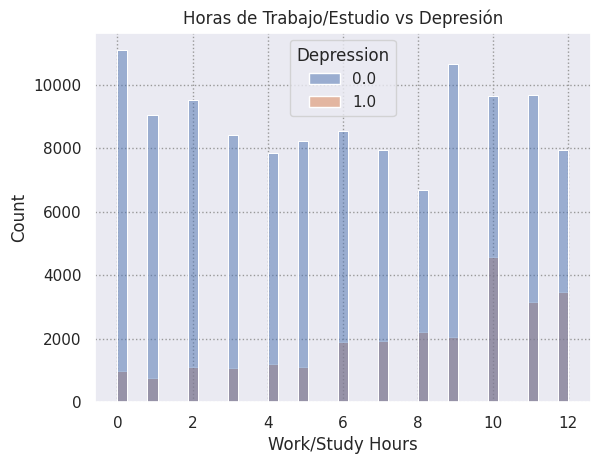

In [16]:
sns.histplot(x='Work/Study Hours', hue=y, data=df, kde = False)
plt.title('Horas de Trabajo/Estudio vs Depresión')
plt.show()

# Obviously the worst load the "mental respite"

#### Heatmap: Correlation matrix

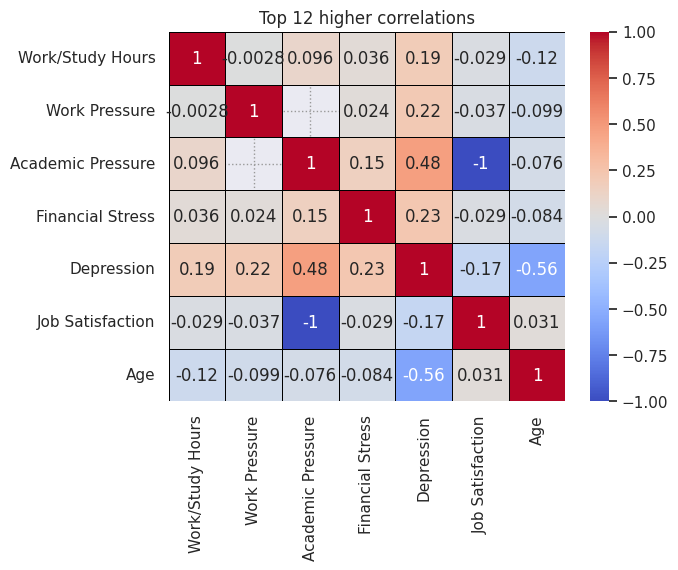

In [17]:
train1,test1 = load()
def corrplot(df):
  numerical_pd = [var for var in df.columns if df[var].dtype != 'O']

  # Calcular la matriz de correlación
  corr_matrix = df[numerical_pd].corr()

  # Encontrar las 12 correlaciones más altas
  # Primero, apilamos la matriz para obtener una lista de pares de correlaciones
  corr_pairs = corr_matrix.abs().unstack()

  # Eliminar las correlaciones entre la misma columna
  corr_pairs = corr_pairs[corr_pairs != 1]

  # Seleccionar las 12 correlaciones más altas
  top_12_corr = corr_pairs.nlargest(12)

  # Extraer las columnas correspondientes a estas correlaciones
  # Tomar solo las columnas involucradas en las correlaciones más altas
  top_12_cols = set()
  for pair in top_12_corr.index:
      top_12_cols.update(pair)

  top_12_cols = list(top_12_cols)

  # Crear la matriz de correlación para estas 12 columnas
  top_12_corr_matrix = corr_matrix.loc[top_12_cols, top_12_cols]

  # Crear el heatmap
  sns.heatmap(top_12_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidth=.5, linecolor = 'black')

  # Mostrar el gráfico
  plt.title('Top 12 higher correlations')
  plt.show()

corrplot(train1)


#### Age is fundamental
#### The academic pressure is the variable that is second most corelated to depression
#### Work pressure and financial pressure are also very important

In [18]:
# Cálculo de sesgo
skewness = df[numerical].skew()

# Imprimir los sesgos
print(skewness)

Age                  -0.213548
Academic Pressure    -0.143192
Work Pressure         0.015253
CGPA                 -0.078960
Study Satisfaction    0.014316
Job Satisfaction      0.060686
Work/Study Hours     -0.127383
Financial Stress      0.039565
dtype: float64


### -- Detectar valores atípicos (Outliers)


In [19]:
from scipy.stats import zscore

# Calcular Z-scores
z_scores = df[numerical].apply(zscore)

# Filtrar outliers (Z-score > 3 o < -3)
outliers = (z_scores.abs() > 3)
outliers_df_pd = df[outliers.any(axis=1)]

print(outliers_df_pd)


Empty DataFrame
Columns: [Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness]
Index: []


In [20]:
### IQR (Interquartile Range):

# Calcular el IQR
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
outliers_IQR = ((df[numerical] < (Q1 - 1.5 * IQR)) | (df[numerical] > (Q3 + 1.5 * IQR)))
outliers_IQR_df = df[outliers_IQR.any(axis=1)]

# display(outliers_IQR_df)

## Data Preprocess.


In [21]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(
#     train, y, random_state=0, test_size=0.2
# )



In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [23]:
categorical = [var for var in train.columns if train[var].dtype == 'O']

# LISTA DE VARIABLES NUMERICAS
numerical = [var for var in train.columns if train[var].dtype != 'O']

# LIST of VARIABLES NUMERICAS CONTINUAS
# continuas = [var for var in numerical if pd.api.types.is_float_dtype(train[var])]

# LISTA DE VARIABLES NUMERICAS DISCRETAS
# discretas = [var for var in numerical if pd.api.types.is_integer_dtype(train[var])]

In [24]:

# # Definir el esquema optimizado para las columnas
# dtypes = {
#     'Age': np.float16,  # O 'float16' si la precisión lo permite
#     'Academic Pressure': np.float16,
#     'Work Pressure': np.float16,
#     'Study Satisfaction': np.float16,
#     'Job Satisfaction': np.float16,
#     'Work/Study Hours': np.float16,
#     'Financial Stress': np.float16,
#     'CGPA': np.float16
# }

# # Cambiar los tipos de datos de las columnas según el esquema
# for column, dtype in dtypes.items():
#     df[column] = df[column].astype(dtype)

## Optimizamos esquemas de datos

In [25]:
# Optimizamos esquemas de datos
df[numerical] = df[numerical].astype('float16')

In [26]:
df[categorical] = df[categorical].astype('category')

In [27]:
"""
category (más eficiente para datos categóricos)
Definición: Almacena una referencia a un índice (número entero) que apunta a un valor único en una lista de categorías
"""

df.dtypes

,0
Gender,category
Age,float16
City,category
Working Professional or Student,category
Profession,category
Academic Pressure,float16
Work Pressure,float16
CGPA,float16
Study Satisfaction,float16
Job Satisfaction,float16


In [28]:
df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.968750,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
234496,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
234497,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.511719,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No


# Base Line

In [29]:
# import numpy as np
# import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

# BASE LINE con Validación Cruzada
def score_dataset_with_cv(X, y, model=LGBMClassifier(random_state=42, verbose = -1)):
    """
    Evalúa un conjunto de datos usando validación cruzada con un modelo base de clasificación.

    X: DataFrame con las características.
    y: Serie o array con las etiquetas de clase.
    model: Modelo a usar. Por defecto, LGBMClassifier.
    """
    # Configuración para validación cruzada estratificada
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

    # Codificar variables categóricas
    for colname in X.select_dtypes(["object", "category"]).columns:
        X[colname] = X[colname].astype("category").cat.codes

    # Predicciones con validación cruzada
    y_pred = cross_val_predict(model, X, y, cv=skf)

    # Calcular métricas principales
    metrics = {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision (Weighted)": precision_score(y, y_pred, average="weighted"),
        "Recall (Weighted)": recall_score(y, y_pred, average="weighted"),
        "F1-Score (Weighted)": f1_score(y, y_pred, average="weighted"),
    }

    print("\n# Métricas Básicas")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Reporte de clasificación
    print("\n# Reporte de Clasificación")
    print(classification_report(y, y_pred))

    # Matriz de confusión
    print("\n# Matriz de Confusión")
    print(confusion_matrix(y, y_pred), "\n")

    return metrics



# x_train, x_test, y_train, y_test = train_test_split(
#     train, y, random_state=0, test_size=0.2
# )

score_dataset_with_cv(train, y)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



# Métricas Básicas
Accuracy: 0.9391
Precision (Weighted): 0.9384
Recall (Weighted): 0.9391
F1-Score (Weighted): 0.9387

# Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    115133
           1       0.84      0.82      0.83     25567

    accuracy                           0.94    140700
   macro avg       0.90      0.89      0.90    140700
weighted avg       0.94      0.94      0.94    140700


# Matriz de Confusión
[[111214   3919]
 [  4656  20911]] 



{'Accuracy': 0.9390547263681592,
 'Precision (Weighted)': 0.9384384628786427,
 'Recall (Weighted)': 0.9390547263681592,
 'F1-Score (Weighted)': 0.938706318950421}

"Weighted" se refiere a cómo se calcula una métrica tomando en cuenta la distribución de las clases en el conjunto de datos.

-----

### Interpretación métrica por métrica:

1. **Accuracy (93.91%)**:  
   El modelo clasifica correctamente el **93.91%** de todas las instancias, lo que refleja un buen desempeño global.

2. **Precision (Weighted) (93.84%)**:  
   Cuando el modelo predice una clase, el **93.84%** de las veces es correcto. Penaliza más los errores en la clase minoritaria (1).

3. **Recall (Weighted) (93.91%)**:  
   El modelo captura correctamente el **93.91%** de todas las instancias reales en las diferentes clases.

4. **F1-Score (Weighted) (93.87%)**:  
   Combina precisión y recall en un equilibrio. Este valor es consistente con las otras métricas, lo que muestra un rendimiento estable.

---

### Interpretación del reporte:

- **Clase 0**:  
  Excelente precisión (96%) y recall (97%), indicando que el modelo clasifica muy bien la mayoría de los ejemplos de esta clase.  
- **Clase 1**:  
  La precisión (84%) y el recall (82%) son más bajos, mostrando que el modelo confunde más esta clase (falsos negativos y positivos).

---

### Matriz de confusión:

- **Clase 0**:  
  Predicciones correctas: **111,214**, errores: **3,919**.  
- **Clase 1**:  
  Predicciones correctas: **20,911**, errores: **4,656** (la mayor debilidad del modelo).  

El modelo funciona bien, pero podría mejorar al identificar la clase minoritaria.

## Evaluacion con ajuste de pesos

----

tenemos que hacer el modelo aprenda mas con la clase minoritaria. podriamos usar tecnicas de rebalanceo como SMOTE y demas, pero afortunadamente LGMBm ofrece facilidad para este asunto

---

## Evaluación con métricas adecuadas
evaluar el rendimiento con métricas que consideren el desbalance de clases, como:

F1-Score (mejor que Accuracy en desbalance)

ROC-AUC (específicamente el área bajo la curva para la clase minoritaria)

Precision-Recall AUC (más adecuado cuando las clases son desbalanceadas)


In [30]:
df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.968750,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
234496,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
234497,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.511719,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No


### Descartado

In [31]:
modelo_balance = LGBMClassifier(verbose =-1, random_state=42, is_unbalance = True)
score_dataset_with_cv(train, y, modelo_balance)
# en general vemos que

#DESCARTADO


# Métricas Básicas
Accuracy: 0.9165
Precision (Weighted): 0.9324
Recall (Weighted): 0.9165
F1-Score (Weighted): 0.9207

# Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.98      0.91      0.95    115133
           1       0.71      0.93      0.80     25567

    accuracy                           0.92    140700
   macro avg       0.84      0.92      0.87    140700
weighted avg       0.93      0.92      0.92    140700


# Matriz de Confusión
[[105235   9898]
 [  1848  23719]] 



{'Accuracy': 0.9165174129353234,
 'Precision (Weighted)': 0.93237578261899,
 'Recall (Weighted)': 0.9165174129353234,
 'F1-Score (Weighted)': 0.920682796511446}

# Feature Enginering

## Imputation

In [32]:
# %%time
# # TEST MEAN # and standard scaler (normalizacion / estandarizacion / o sea media 0 y desv. estandar de 1)
# from sklearn.preprocessing import StandardScaler

# # deal with numerical columns
# numerical_pipeline = Pipeline(
# [
# ('select_numerical_features', FunctionTransformer(lambda df: df[numerical])),
# ('impute', SimpleImputer(strategy='median')),
# # ('scale', StandardScaler()) # scale our numerical features
# ]
# )

# # Pipeline para columnas categóricas usando solo scikit-learn
# categorical_pipeline = Pipeline([
#     # Seleccionar solo las columnas categóricas
#     ('select_categorical_features', FunctionTransformer(lambda df: df[categorical], validate=False)),
#     # Imputar valores faltantes
#     # ('categorical_imputer', SimpleImputer(strategy='constant', fill_value=999)), # YA SON NUMERIOCOS
#     ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
#     # Codificación ordinal
# ])

# simple_fe = FeatureUnion([
# ('numerical_pipeline', numerical_pipeline),
# ('categorical_pipeline', categorical_pipeline)
# ])

# df = simple_fe.fit_transform(df)


In [33]:
for colname in df.select_dtypes(["object", "category"]).columns:
    df[colname] = df[colname].astype("category").cat.codes

In [34]:
df_fill = df.fillna(-1) # rellenado

## Optimizamos esquema de datos

In [35]:
# Crear una nueva lista sin "CGPA"
filtered_data = [item for item in numerical if item != "CGPA"]
df_fill[filtered_data] = df_fill[filtered_data].astype("int8")
df_fill.info()


<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 234499
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 234500 non-null  int8   
 1   Age                                    234500 non-null  int8   
 2   City                                   234500 non-null  int8   
 3   Working Professional or Student        234500 non-null  int8   
 4   Profession                             234500 non-null  int8   
 5   Academic Pressure                      234500 non-null  int8   
 6   Work Pressure                          234500 non-null  int8   
 7   CGPA                                   234500 non-null  float16
 8   Study Satisfaction                     234500 non-null  int8   
 9   Job Satisfaction                       234500 non-null  int8   
 10  Sleep Duration                         234500 non-null  int8 

In [36]:
train_size = train.shape[0]
train1 = df_fill.iloc[:train_size]
test1 = df_fill.iloc[train_size:]

In [37]:
score_dataset_with_cv(train1, y)


# Métricas Básicas
Accuracy: 0.9391
Precision (Weighted): 0.9385
Recall (Weighted): 0.9391
F1-Score (Weighted): 0.9388

# Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    115133
           1       0.84      0.82      0.83     25567

    accuracy                           0.94    140700
   macro avg       0.90      0.89      0.90    140700
weighted avg       0.94      0.94      0.94    140700


# Matriz de Confusión
[[111210   3923]
 [  4641  20926]] 



{'Accuracy': 0.9391329068941009,
 'Precision (Weighted)': 0.9385316980952217,
 'Recall (Weighted)': 0.9391329068941009,
 'F1-Score (Weighted)': 0.9387940880832806}

-----

In [38]:
def new_feats(df):
    df = (
        df.assign(satisfaction_by_work=df["Work Pressure"] / df["Job Satisfaction"])
        .assign(
            satisfaction_by_study=df["Academic Pressure"] / df["Study Satisfaction"]
        )
        .assign(age_work_satisfaction=df["Age"] / df["Job Satisfaction"])
        .assign(cgpa_study=df["CGPA"] / df["Academic Pressure"])
    )
    return df

train1 = new_feats(train1)
test1 = new_feats(test1)

# MODEL

## Incorporating LGBM with Greater Weight in a votting clasifier

In [54]:
# import numpy as np
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(
    train1, y, test_size=0.30, random_state=42)

# Define individual classifiers
clf1 = LogisticRegression(max_iter=200, random_state=42)
# clf2 = SVC(probability=True, random_state=42)
clf3 = LGBMClassifier(random_state=42, verbose = -1)

# Create a VotingClassifier with weights (LGBM given higher weight)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf1),
        # ('svc', clf2),
        ('lgbm', clf3)
    ],
    voting='soft',  # Use soft voting for weighted probabilities
    weights=[1,2]  # Assign higher weight to LGBM
)

# Fit and evaluate
voting_clf.fit(X_train, y_train)
accuracy = voting_clf.score(X_test, y_test)
print(f"Accuracy with LGBM (weighted): {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with LGBM (weighted): 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with LGBM (weighted): 0.94


In [57]:
predictions = voting_clf.predict(test1)

output = pd.DataFrame({'id': test1.index, 'Depression': predictions})
output

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [58]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
